# Introduction : 

The goal of this project is to create a model capable of detecting human emotion within images. For that we dispose of a dataset containing more than 28700 images and our objectif is to classify them into one of 7 categories : angry, digust, fear, happy, neutral, sad and surprise.

For that we are going to use CNNs (Convolutional Neural Network)

## The rise in popularity of computer vision and Convolutional Neural Networks:

There has a been a huge bloom in popularity when it comes to the field of computer vision and research is ongoing to keep improving on the way computers see and understand images.
This rise in popularity can be largely acredited to the discovery of CNNs and their effectiveness. Although CNNs basic concept dates back to 1990 first proposed by Yann LeCun, Yoshua Bengio, and others, at that time, the computational resources required to train and run deep neural networks were limited, and the availability of labeled image datasets was also limited. 

It is not until a CNN called AlexNet, developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, significantly outperformed traditional computer vision algorithms on ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012 that CNNs were popularized. And since then CNNs have been the stable when it comes to image classification, image recognition, image segmentation and many others.


# Preprocessing:

Since the dataset is extremely large and complex, it poses a significant challenge to our computing systems, which may not be able to handle the amount of images during training. To overcome this obstacle, we will employ two powerful tools: data generators.

Data generators are like mini-factories that churn out small batches of images on-the-fly during training. By breaking down the dataset into more manageable chunks, data generators can prevent our notebook from crashing or running out of memory. They can also be incredibly efficient, since we only need to load and process the images that are required for the current batch, rather than the entire dataset.

We are also going to use data augmentation which is a clever trick that can boost the performance of our model. The idea behind data augmentation is simple: by applying various transformations to the training images, such as rotation, shifting, or flipping, we can create new versions of the images that are slightly different from the originals. These variations can help our model become more robust and flexible, able to recognize patterns and features that are present in a wider range of images.

The benefits of data augmentation go beyond simply making our dataset bigger. By exposing our model to a diverse range of images, we can reduce the risk of overfitting, which is a common problem in machine learning. Overfitting occurs when our model becomes too specialized in recognizing the patterns in the training set, to the point where it becomes less effective at recognizing patterns in new, unseen data. By introducing variability into the training process, data augmentation can help our model generalize better and avoid overfitting.

### Loading the libraries:

In [1]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [2]:
d ={}
train_path = "/kaggle/input/fer2013/train"
for folder in sorted(os.listdir(train_path)): 
    folder_path = os.path.join(train_path,folder)
    d[folder] = []
    for image in os.listdir(folder_path)[:5]:
        image_path = os.path.join(folder_path,image)
        image = np.array(Image.open(image_path))
        d[folder].append(image)

In [3]:
def plot_images(d,label): 
    fig, ax = plt.subplots(1,5, figsize = (10,2))
    fig.suptitle('Images labelled : {}' .format(label), fontsize=11)
    for col in range(5): 
        ax[col].imshow(d[label][col])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)

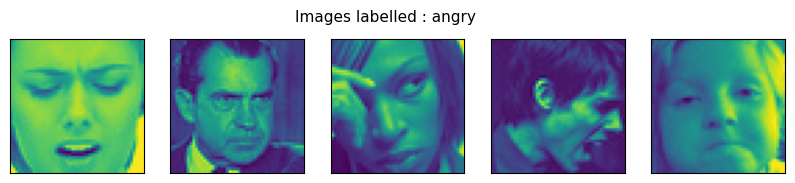

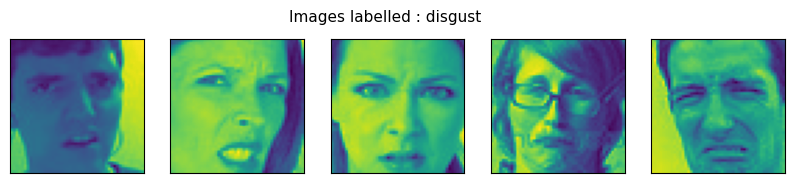

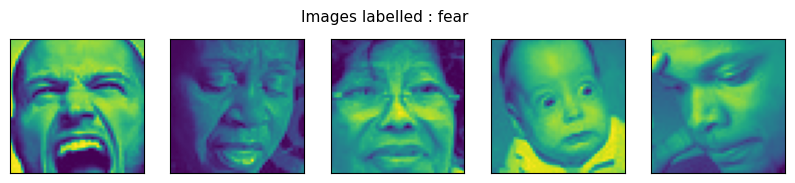

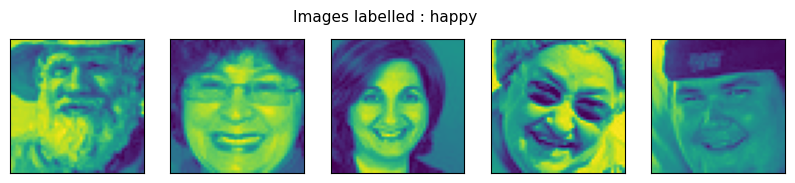

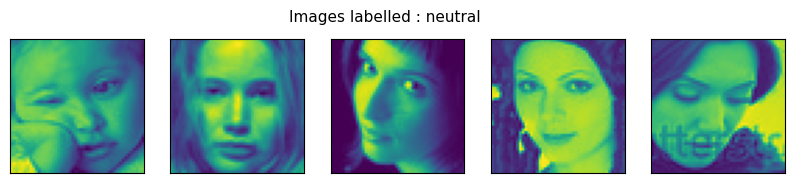

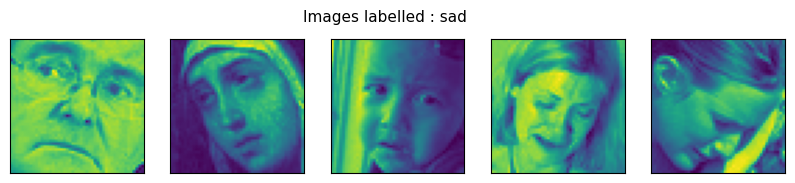

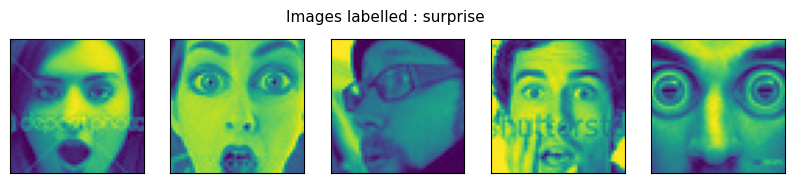

In [4]:
for key in d.keys():
    plot_images(d,key)

In [5]:
train_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=25, width_shift_range=0.1,
        height_shift_range=0.1, shear_range=0.2, 
        zoom_range=0.2,horizontal_flip=True, 
        fill_mode="nearest")
val_aug = ImageDataGenerator(
        preprocessing_function=preprocess_input
)

In [6]:
train_data = train_aug.flow_from_directory(
            train_path,
            target_size = (48,48),
            shuffle = True)

Found 28709 images belonging to 7 classes.


In [7]:
val_data = val_aug.flow_from_directory(
        "/kaggle/input/fer2013/test",
        target_size = (48,48),
        shuffle = False
            )

Found 7178 images belonging to 7 classes.


# Modeling : 

In order to build our CNN architecture, we will commence by defining the input layer, along with the number of filters to be used in the first convolutional layer. Subsequently, we will add a sequence of convolutional layers, with each subsequent layer having a greater number of filters than the previous one. We will also include max-pooling layers to reduce the feature map's spatial dimensions. Finally, we will attach fully connected layers to the convolutional layers, with the softmax activation function being applied to classify the emotions.

In addition, we will implement methods such as dropout and batch normalization to avoid overfitting and enhance the model's generalization capability.

In [8]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64,(3,3),padding = "same", activation = "relu", input_shape = (48,48,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
    
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
    model.add(MaxPool2D(2,2))
  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [9]:
model = create_model()

In [10]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0

## Training:

In [12]:
model.fit(train_data,epochs = 50,validation_data = val_data)

Epoch 1/50
898/898 [==============================] - 188s 196ms/step - loss: 1.8717 - accuracy: 0.2330 - val_loss: 1.7938 - val_accuracy: 0.2483
Epoch 2/50
898/898 [==============================] - 61s 68ms/step - loss: 1.7789 - accuracy: 0.2628 - val_loss: 1.7047 - val_accuracy: 0.3142
Epoch 3/50
898/898 [==============================] - 62s 69ms/step - loss: 1.7327 - accuracy: 0.2924 - val_loss: 1.6092 - val_accuracy: 0.3653
Epoch 4/50
898/898 [==============================] - 61s 68ms/step - loss: 1.6583 - accuracy: 0.3411 - val_loss: 1.5175 - val_accuracy: 0.3993
Epoch 5/50
898/898 [==============================] - 61s 68ms/step - loss: 1.5427 - accuracy: 0.3908 - val_loss: 1.5681 - val_accuracy: 0.3824
Epoch 6/50
898/898 [==============================] - 62s 69ms/step - loss: 1.4386 - accuracy: 0.4392 - val_loss: 1.4731 - val_accuracy: 0.4313
Epoch 7/50
898/898 [==============================] - 62s 69ms/step - loss: 1.4167 - accuracy: 0.4521 - val_loss: 1.7766 - val_accurac

## Confusion matrix:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


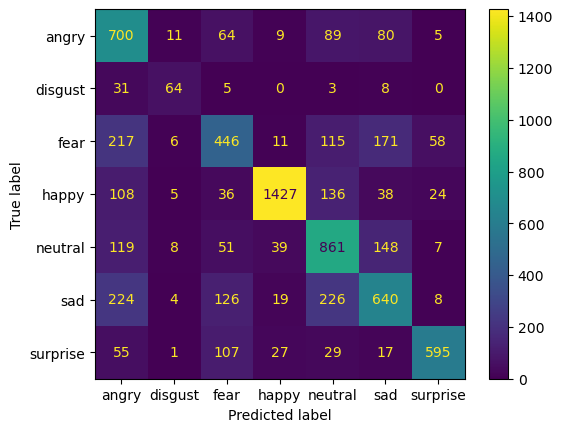

In [13]:
y_pred = model.predict_generator(val_data)
y_pred_classes = np.argmax(y_pred, axis = 1)

ConfusionMatrixDisplay(confusion_matrix(val_data.classes,y_pred_classes),
                       display_labels=list(train_data.class_indices.keys())).plot()

## Visualizing Errors:

In [14]:
def get_label(i):
    return list(train_data.class_indices.keys())[i]

In [15]:
X_test = []

test_path = "/kaggle/input/fer2013/test"

for folder in sorted(os.listdir(test_path)):
    image_folder =  test_path +"/"+ folder
    images = sorted(os.listdir(image_folder))
    print ('Loaded the images of -'+'{} having {} images. \n'.format(folder, len(images)))
    for image in images:
        image_path = image_folder +"/"+ image
        x = Image.open(image_path)
        x = x.convert("RGB")
        x = np.array(x)
        img_resize = cv2.resize(x, (224,224))
        X_test.append(img_resize)

Loaded the images of -angry having 958 images. 

Loaded the images of -disgust having 111 images. 

Loaded the images of -fear having 1024 images. 

Loaded the images of -happy having 1774 images. 

Loaded the images of -neutral having 1233 images. 

Loaded the images of -sad having 1247 images. 

Loaded the images of -surprise having 831 images. 



In [16]:
def plot_errors(true_label,predicted_label):
    rows,cols = 1,5
    fig, ax = plt.subplots(rows,cols,figsize=(10, 3))
    x = ((y_pred_classes == predicted_label) & (val_data.classes == true_label))
    y = np.where(x == True)[0]
    z = np.random.randint(0,len(y),5)
    fig.suptitle('Predicted : {}, Real : {}' .format(get_label(predicted_label), get_label(true_label)), fontsize=11)
    for col in range(cols):
        ax[col].imshow(X_test[y[z[col]]])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)

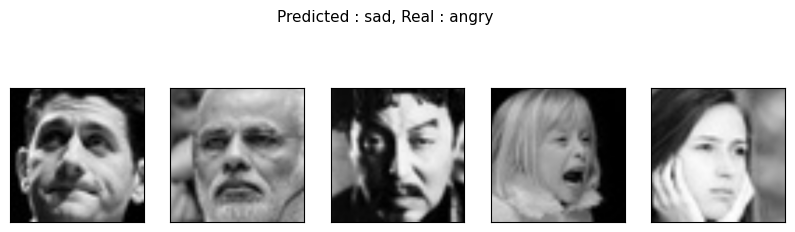

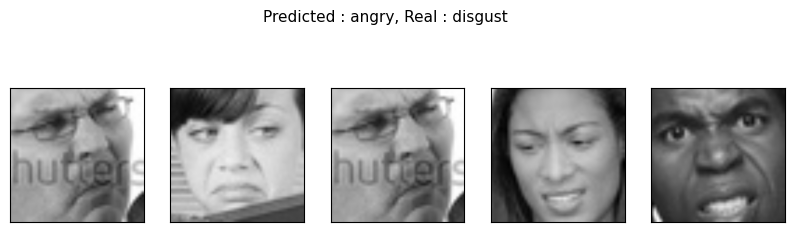

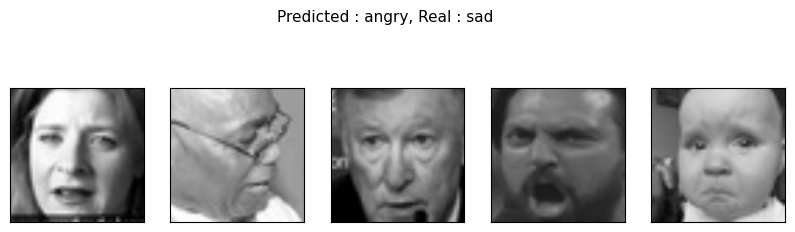

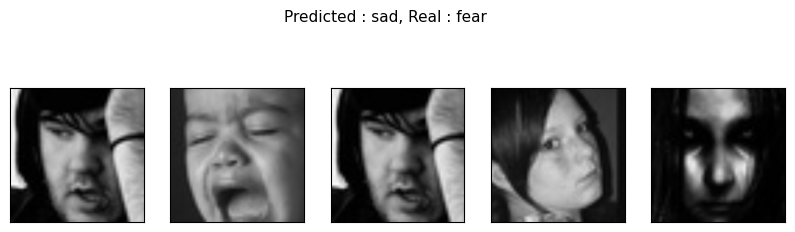

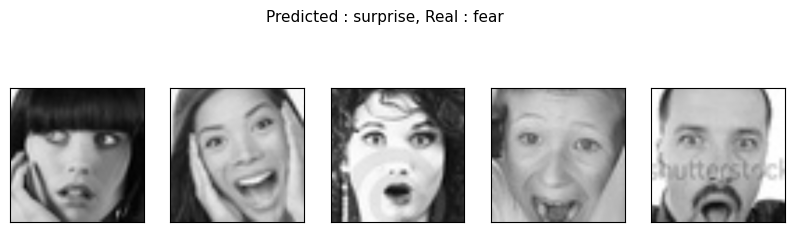

In [17]:
plot_errors(0,5)
plot_errors(1,0)
plot_errors(5,0)
plot_errors(2,5)
plot_errors(2,6)